In [1]:
import tangos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# z=0 Population Figure

Halos that we have selected: 
* 431
* 468
* 492
* 502
* 523
* 569
* 597
* 615
* 618

In [21]:
# load data for selected galaxies
fpath = '~/H1-merian/csvs/selectedMasses_rom.txt'
dfSelected = pd.read_csv(fpath)
mvir_sel = dfSelected['Mvir'].to_numpy()
mgas_sel = dfSelected['Mgas'].to_numpy()
mbar_sel = dfSelected['Mbar'].to_numpy()
mstar_sel = dfSelected['Mstar'].to_numpy()

In [15]:
# load data for all galaxies
fpath = '~/H1-merian/figures/popFig/z08_MvirMstar.csv'
df = pd.read_csv(fpath)
mstar = df['Mstar'].to_numpy()
mvir = df['Mvir'].to_numpy()

In [17]:
# find satellite galaxies
sim = tangos.get_simulation("cosmo25") 
ts = sim.timesteps[-6]

centers = ts.calculate_all('shrink_center')[0]
radii = ts.calculate_all('max_radius')[0]
masses = ts.calculate_all('Mvir')[0]

satellites = []
for i in range(4000):
    offsets = np.linalg.norm(centers[i] - centers[masses>masses[i]], axis=1)
    host_mask = offsets<(radii[masses>masses[i]])
    if True in host_mask:
        satellites.append(i)
        
# remove from plot
mstar= np.delete(mstar,satellites)
mvir = np.delete(mvir, satellites)

In [18]:
# make mass cut in mstar
mLB_star = 10**7.9
mUB_star = 10**10.5

mLB_vir = 10**10 
mUB_vir = 10**11

mvir = mvir[mstar<mUB_star]
mstar = mstar[mstar<mUB_star]

mvir = mvir[mstar>mLB_star]
mstar = mstar[mstar>mLB_star]

mstar = mstar[mvir<mUB_vir]
mvir = mvir[mvir<mUB_vir]

mstar = mstar[mvir>mLB_vir]
mvir = mvir[mvir>mLB_vir]

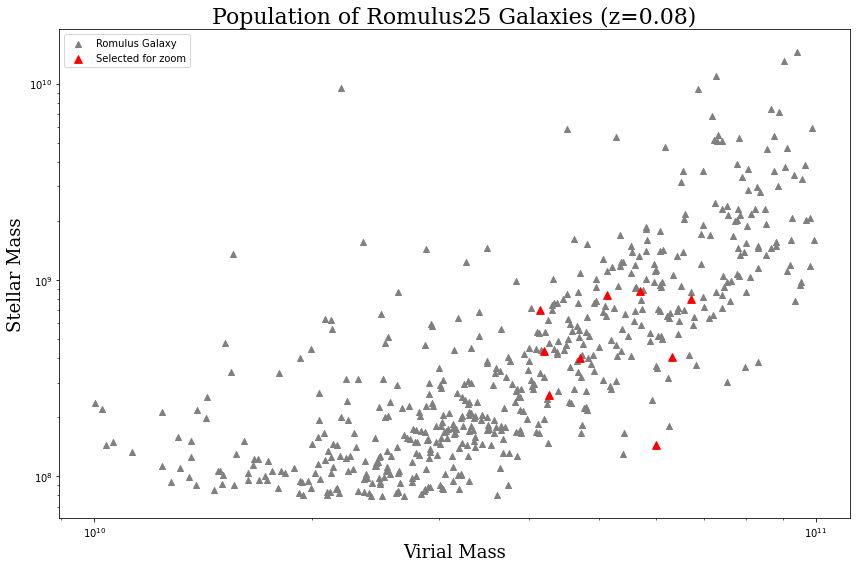

In [22]:
fig = plt.figure(figsize=(12,8))

plt.scatter(mvir,mstar, marker='^', c='gray')
plt.scatter(mvir_sel, mstar_sel, marker='^', c='red', s=60)
plt.xscale('log')
plt.yscale('log')

plt.title('Population of Romulus25 Galaxies (z=0.08)', fontsize=22, fontfamily='serif')
plt.xlabel('Virial Mass', fontsize=18, fontfamily='serif')
plt.ylabel('Stellar Mass', fontsize=18, fontfamily='serif')

plt.legend(['Romulus Galaxy', 'Selected for zoom'])

plt.tight_layout()

plt.savefig('../figures/popFig/popFig_z08.png')